In [1]:
martini2= [105,75,15,5,20,130,200,105,75,15,5,20,130,175,260,90,185,200,200,200,200,225,200,100,100,100,260,80,120,200,200,200,200,200,230,170,155,200,200,200]
K_boltzmann = [1.28867059,5.661059458,1.245206503,5.076485092,5.421039491,1.557185528,1.938639895,
               1.289768048,1.438540753,4.957645528,5.863961859,5.435250012,1.557185342,7.843628387,
               6.103702367,1.344723432,6.088464154,4.900443822,5.435591931,6.892929403,6.502198579,2.248206583,5.638250653,1.474018311,2.399082086,2.665829516,1.283615204,5.59745385,5.693773202,1.691131757,6.61821624,6.618221496,6.618221496,6.583588862,2.117515328,6.466035917,7.280278184,1.782737205,6.517495727,2.189257519]
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.11587783],
       [0.11587783, 1.        ]])

In [1]:
martini_data = [95,93,160,180,170,130,84,117,95,153,135,87,115,74,92,95,99,99,55,42,103,129,137,72,117,84,96.5,94,103,155,61,71,47]
boltzmann_dist_data = [125.663706,73.8413927,119.3805039,114.6378421,120.9222999,116.238933,
                       84.82301227,108.3770019,32.78549324,94.24767528,124.0840892,89.67526512,111.7107208,70.72468218,92.70268831,28.27434755,98.94955378,153.9380343,50.26548217,53.40700105,25.13287108,111.5818678,123.9555317,69.11505445,95.97250557,117.6557956,92.69336142,34.55751887,102.1555248,149.1928888,62.83185286,70.7398918,53.40707502]
gaussian_dist_data = [122.1347568,73.39134034,122.4384606,118.050877,121.0347794,117.4133302,
                      83.6883298,104.0040409,33.31613666,113.5895066,125.1413646,85.48132898,
                      111.3852574,71.23714547,91.64029912,28.7881953,98.34443939,151.4579902,
                      49.56677413,53.33387722,33.59831125,112.3778997,124.1142382,70.41805097,
                      113.239885,83.6883298,92.36503846,28.58879239,98.17228412,149.8977137,
                      61.97353067,70.50855771,47.46694594]


# import numpy as np
# np.corrcoef(martini_data, boltzmann_dist_data)


import numpy as np
print("correlation of distance : martini2 vs boltzmann")
print(np.corrcoef(martini_data, boltzmann_dist_data))

print("correlation of distance : gaussian vs boltzmann")
print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : martini2 vs boltzmann
[[1.         0.60150358]
 [0.60150358 1.        ]]
correlation of distance : gaussian vs boltzmann
[[1.         0.97250744]
 [0.97250744 1.        ]]


In [3]:
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plot
import math
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
angle_parameters = pd.DataFrame()
angle_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [5]:
angle_dict = dict.fromkeys(['BB1_BB2_BB3','BB2_BB3_ASC1','BB3_ASC1_ASC2','BB3_ASC1_ASC4','ASC1_ASC2_ASC3',\
'ASC2_ASC1_ASC4','ASC2_ASC3_ASC4','ASC3_ASC4_ASC1','BB2_BB3_USC1','BB3_USC1_USC2','BB3_USC1_USC3','USC1_USC2_USC3',\
'USC1_USC2_USC3','USC2_USC1_USC3','USC2_USC3_USC1','BB2_BB3_GSC1','BB3_GSC1_GSC2','BB3_GSC1_GSC4','GSC1_GSC2_GSC3','GSC2_GSC1_GSC4',\
'GSC2_GSC3_GSC4','GSC3_GSC4_GSC1','BB2_BB3_CSC1','BB3_CSC1_CSC2','BB3_CSC1_CSC3','CSC1_CSC2_CSC3','CSC2_CSC1_CSC3',\
'CSC2_CSC3_CSC1','BB2_BB3_pBB1','BB3_pBB1_pBB2','ASC1_BB3_pBB1','USC1_BB3_pBB1','GSC1_BB3_pBB1','CSC1_BB3_pBB1'])

In [6]:
df_Hmapped_angle_all = pd.read_csv('angle_final_allmolecules.csv')

In [7]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [8]:
BB1_BB2_BB3_Hmapped_angle_all = df_Hmapped_angle_all['BB1_BB2_BB3']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB3_ASC1_ASC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC2']
BB3_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC4']
ASC1_ASC2_ASC3_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_ASC2_ASC3']
ASC2_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC1_ASC4']
ASC2_ASC3_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC3_ASC4']
ASC3_ASC4_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['ASC3_ASC4_ASC1']
BB2_BB3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_USC1']
BB3_USC1_USC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC2']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
USC1_USC2_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC1_USC2_USC3']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
# USC2_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC1_USC3']
USC2_USC3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC3_USC1']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB2_BB3_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_GSC1']
BB3_GSC1_GSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC2']
BB3_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC4']
GSC1_GSC2_GSC3_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_GSC2_GSC3']
GSC2_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC1_GSC4']
GSC2_GSC3_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC3_GSC4']
GSC3_GSC4_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['GSC3_GSC4_GSC1']
BB2_BB3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_CSC1']
BB3_CSC1_CSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC2']
BB3_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC3']
CSC1_CSC2_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_CSC2_CSC3']
CSC2_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC1_CSC3']
CSC2_CSC3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC3_CSC1']
BB2_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_pBB1']
BB3_pBB1_pBB2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_pBB1_pBB2']
ASC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_BB3_pBB1']
USC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['USC1_BB3_pBB1']
GSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_BB3_pBB1']
CSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_BB3_pBB1']

In [9]:
BB2_BB3_USC1_Hmapped_angle_all

0       29.688
1       29.897
2       28.912
3       28.848
4       30.515
         ...  
9894    28.222
9895    28.768
9896    28.740
9897    28.251
9898    29.266
Name: BB2_BB3_USC1, Length: 9899, dtype: float64

In [273]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)


In [274]:
import math
def harmonic_angle(theta, theta0, k):
    coslist = []
    for t in theta:
        coslist.append(math.cos(t) - math.cos(theta0))
    final_coslist = np.array(coslist)
    val = 0.5 * k * final_coslist ** 2
    return val

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 124.15553045762198
Mode: Raw data 122.13475677712452
Mode: Gauss-fitted 122.13475677712452


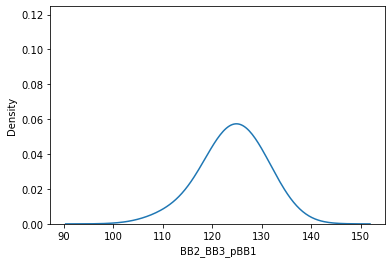

In [275]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  125.66370599343739
parameter K is:  1.2886705896612833


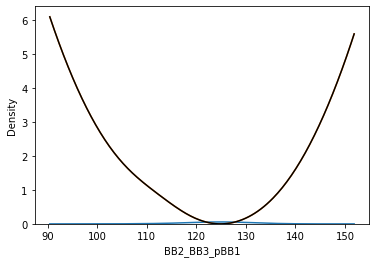

In [276]:

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[123, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2_Hmapped_angle_all
Mean: Raw data 74.78635316698656
Mode: Raw data 73.39134033583275
Mode: Gauss-fitted 73.39134033583275


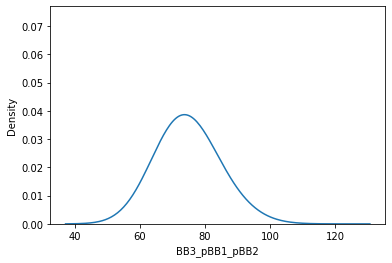

In [277]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  73.84139269890126
parameter K is:  5.66105945848361


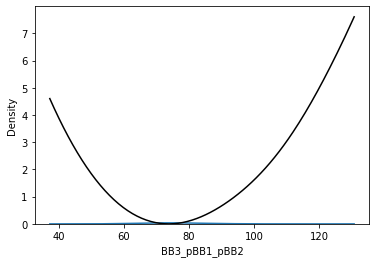

In [278]:

#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
# plt.plot(xdata,U,color='black')

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[74, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB3_pBB1_pBB2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 126.22359511061724
Mode: Raw data 122.43846059664605
Mode: Gauss-fitted 122.43846059664605


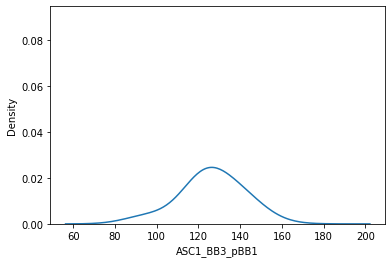

In [279]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  119.38050386129368
parameter K is:  1.245206503303162


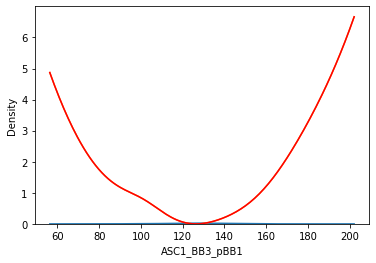

In [280]:

#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.8)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('ASC1_BB3_pBB1_Hmapped_angle_all')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 120.03347429033235
Mode: Raw data 118.05087697151929
Mode: Gauss-fitted 118.05087697151929


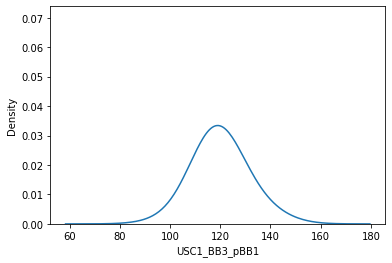

In [281]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  124.12319707481394
parameter K is:  5.0764890334048225


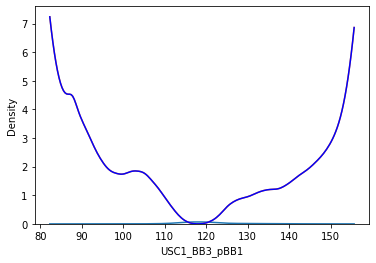

In [282]:

#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[120, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('USC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 124.70608414991413
Mode: Raw data 121.03477937547758
Mode: Gauss-fitted 121.03477937547758


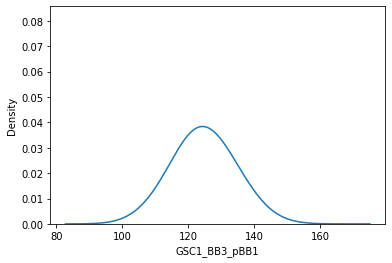

In [283]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.9222998960981
parameter K is:  5.421039491318701


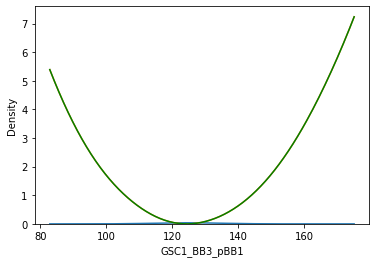

In [284]:

#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[121, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 119.06957813920597
Mode: Raw data 117.413330157782
Mode: Gauss-fitted 117.413330157782


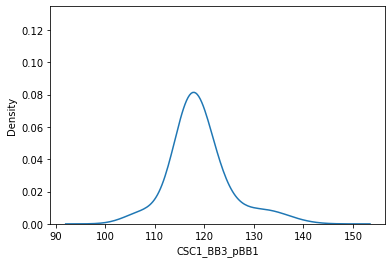

In [285]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  116.2389330043555
parameter K is:  1.5571855283653342


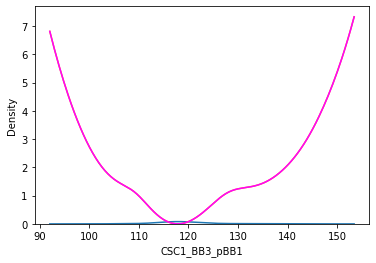

In [286]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[117, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('CSC1_BB3_pBB1_Hmapped_angle_all')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.73995545004544
Mode: Raw data 83.68832980328057
Mode: Gauss-fitted 83.68832980328057


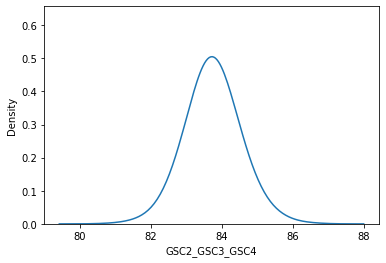

In [287]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  84.82301226797802
parameter K is:  1.9386398945029462


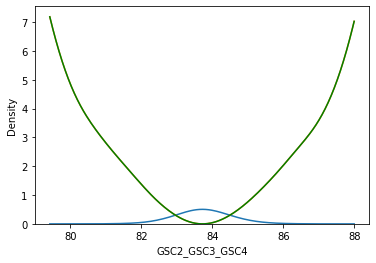

In [288]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[84, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC2_GSC3_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 124.15553045762198
Mode: Raw data 122.13475677712452
Mode: Gauss-fitted 122.13475677712452


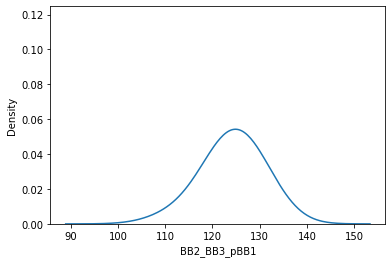

In [289]:
 # Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.9361437126883
parameter K is:  4.831588339915423


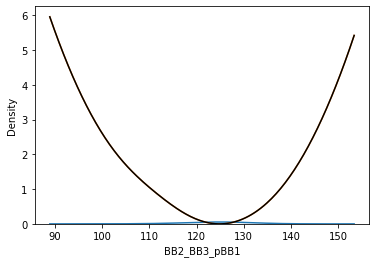

In [290]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=1.1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_pBB2_Hmapped_angle_all
Mean: Raw data 74.78635316698656
Mode: Raw data 73.39134033583275
Mode: Gauss-fitted 73.39134033583275


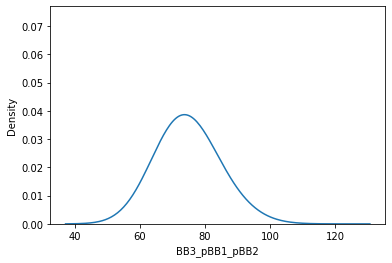

In [291]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_pBB1_pBB2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  76.95507372049737
parameter K is:  5.661071863511958


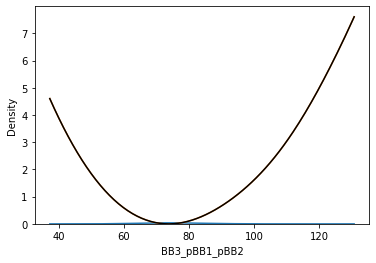

In [292]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[73, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_pBB1_pBB2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 126.22359511061724
Mode: Raw data 122.43846059664605
Mode: Gauss-fitted 122.43846059664605


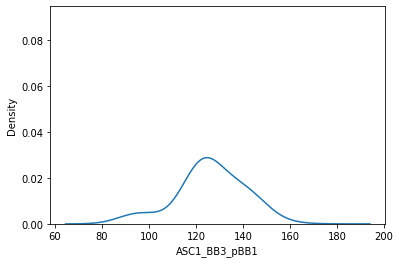

In [293]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.6)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.92810440007908
parameter K is:  4.957645528494832


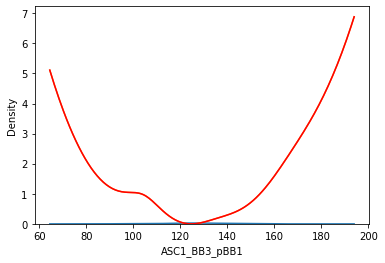

In [294]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=0.6)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[122, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


USC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 120.03347429033235
Mode: Raw data 118.05087697151929
Mode: Gauss-fitted 118.05087697151929


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


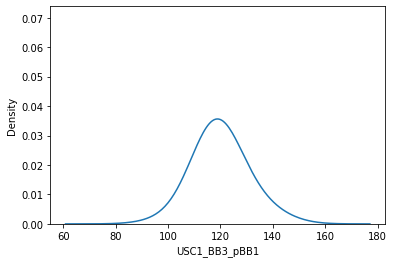

In [295]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  117.77885266352749
parameter K is:  5.863961859409462


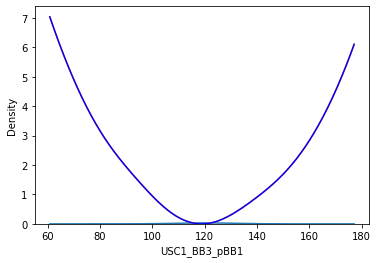

In [296]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[118, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 124.70608414991413
Mode: Raw data 121.03477937547758
Mode: Gauss-fitted 121.03477937547758


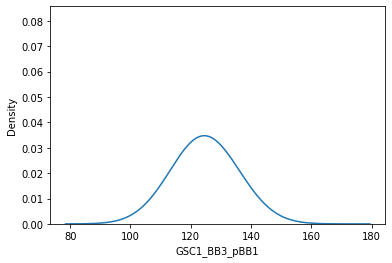

In [297]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  120.9324196235452
parameter K is:  5.435245684780155


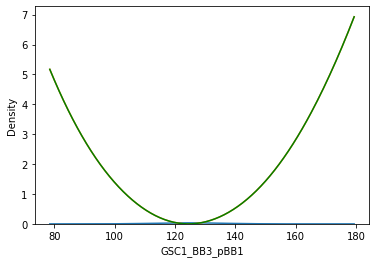

In [298]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[121, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_BB3_pBB1_Hmapped_angle_all
Mean: Raw data 119.06957813920597
Mode: Raw data 117.413330157782
Mode: Gauss-fitted 117.413330157782


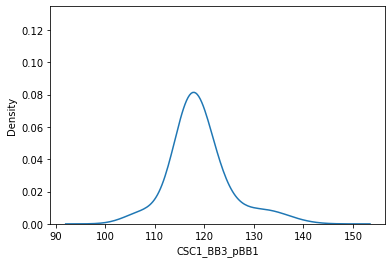

In [299]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  116.23894888156906
parameter K is:  1.557185342174521


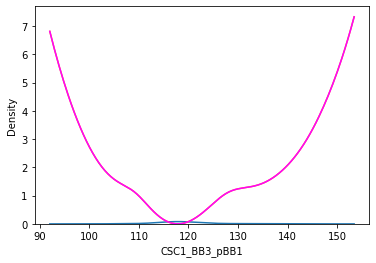

In [300]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[117, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC1_BB3_pBB1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_Hmapped_angle_all
Mean: Raw data 103.4589479745429
Mode: Raw data 104.00404090382273
Mode: Gauss-fitted 104.00404090382273


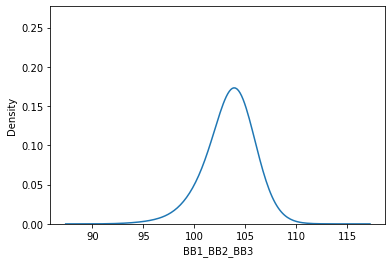

In [301]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_Hmapped_angle_all)
xmean = np.mean(BB1_BB2_BB3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB1_BB2_BB3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  108.37700188248783
parameter K is:  7.843628387114724


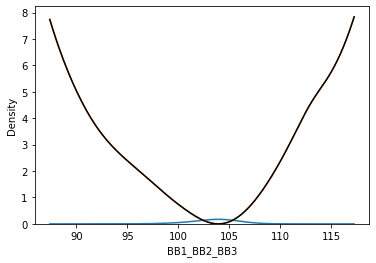

In [302]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[104, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB1_BB2_BB3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_ASC1_Hmapped_angle_all
Mean: Raw data 32.297152944741896
Mode: Raw data 33.316136660840115
Mode: Gauss-fitted 33.316136660840115


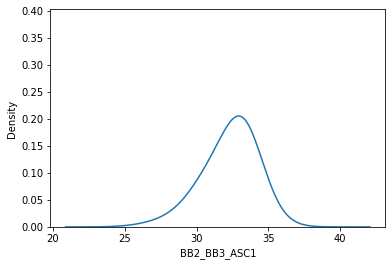

In [303]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_ASC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  32.785493235956345
parameter K is:  6.103702366991488


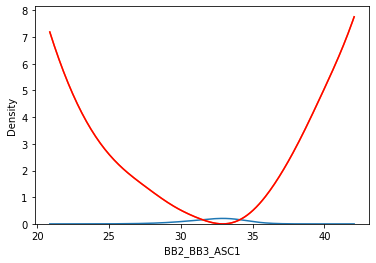

In [304]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_ASC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC2_Hmapped_angle_all
Mean: Raw data 117.4095921810284
Mode: Raw data 113.5895066300035
Mode: Gauss-fitted 113.5895066300035


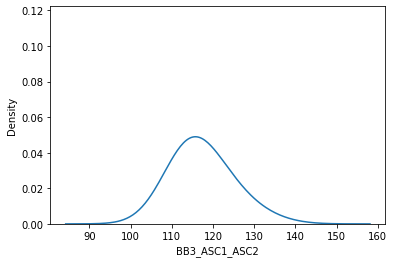

In [305]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC2_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_ASC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_ASC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  94.24767527975229
parameter K is:  1.3447234317994576


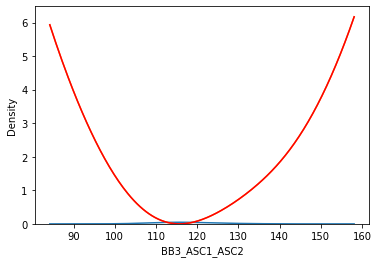

In [306]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[113, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_ASC1_ASC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_ASC4_Hmapped_angle_all
Mean: Raw data 123.5161909283766
Mode: Raw data 125.14136460807293
Mode: Gauss-fitted 125.14136460807293


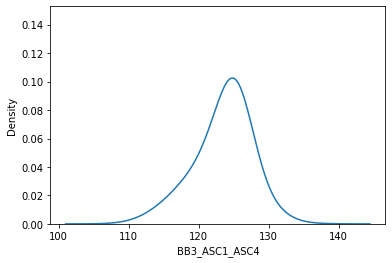

In [307]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  124.084089166763
parameter K is:  6.088464153823125


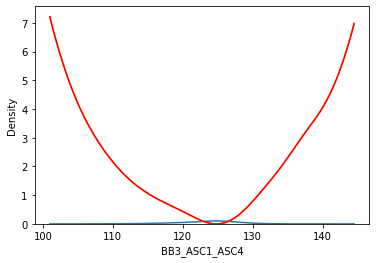

In [308]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[124, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_ASC1_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_ASC3_Hmapped_angle_all
Mean: Raw data 85.44339387816952
Mode: Raw data 85.48132898433695
Mode: Gauss-fitted 85.48132898433695


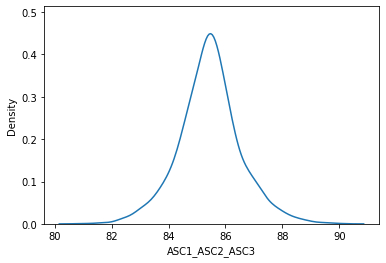

In [309]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_ASC3_Hmapped_angle_all)
xmean = np.mean(ASC1_ASC2_ASC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC2_ASC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_ASC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_ASC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  89.67526511951829
parameter K is:  4.900443821763885


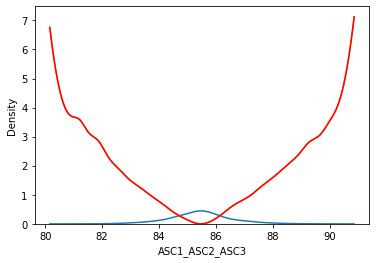

In [310]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[85.4, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC1_ASC2_ASC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC1_ASC4_Hmapped_angle_all
Mean: Raw data 111.37301808263462
Mode: Raw data 111.38525740515239
Mode: Gauss-fitted 111.38525740515239


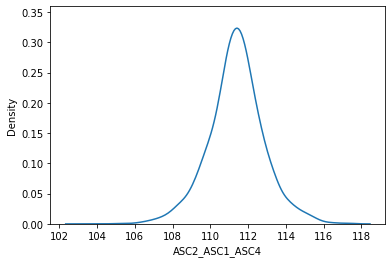

In [311]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC1_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC1_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  111.71072080532605
parameter K is:  5.435591930746768


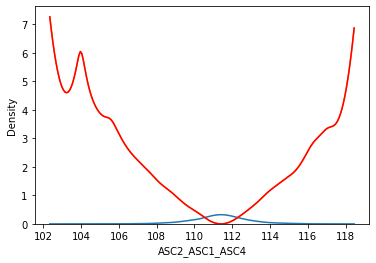

In [312]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[111, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC2_ASC1_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_ASC4_Hmapped_angle_all
Mean: Raw data 71.25554793413475
Mode: Raw data 71.23714546767864
Mode: Gauss-fitted 71.23714546767864


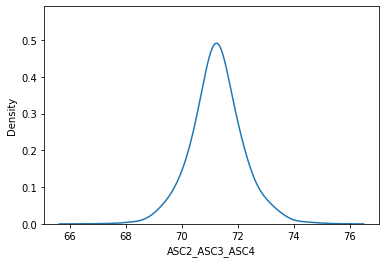

In [313]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC3_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC2_ASC3_ASC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_ASC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC3_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  70.72468218427835
parameter K is:  6.8929294032675426


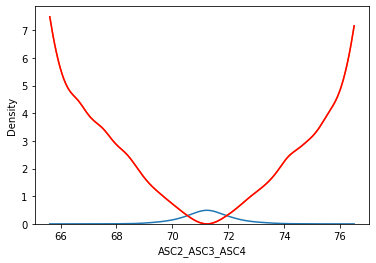

In [314]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[71, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC2_ASC3_ASC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_ASC1_Hmapped_angle_all
Mean: Raw data 91.72564178199818
Mode: Raw data 91.64029911994646
Mode: Gauss-fitted 91.64029911994646


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


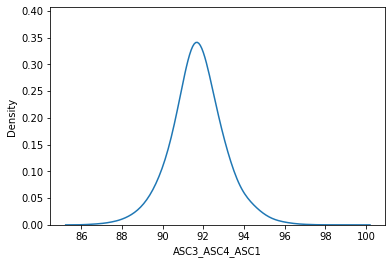

In [315]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_ASC1_Hmapped_angle_all)
xmean = np.mean(ASC3_ASC4_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC3_ASC4_ASC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_ASC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC3_ASC4_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  92.70268830765664
parameter K is:  6.502198579266769


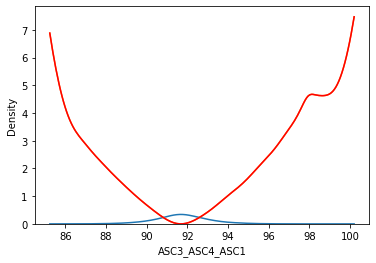

In [316]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[91.7, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('ASC3_ASC4_ASC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_USC1_Hmapped_angle_all
Mean: Raw data 29.02857359329225
Mode: Raw data 28.788195300922283
Mode: Gauss-fitted 28.788195300922283


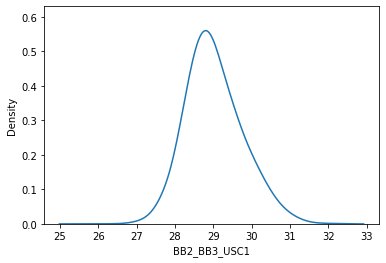

In [317]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_USC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  28.27434755122388
parameter K is:  2.248206583243703


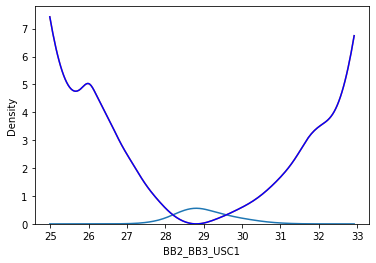

In [318]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[28, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_USC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC2_Hmapped_angle_all
Mean: Raw data 100.62308758460449
Mode: Raw data 98.34443939048307
Mode: Gauss-fitted 98.34443939048307


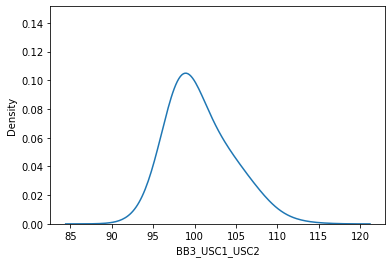

In [319]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC2_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_USC1_USC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_USC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  98.94955378460257
parameter K is:  5.638250653045603


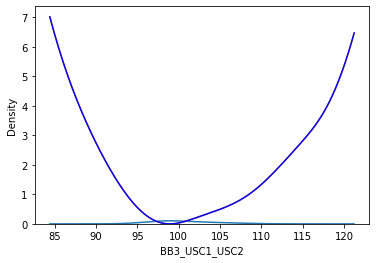

In [320]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[98.5, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_USC1_USC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB3_USC1_USC3_Hmapped_angle_all
Mean: Raw data 153.18026295585412
Mode: Raw data 151.4579902370703
Mode: Gauss-fitted 151.4579902370703


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


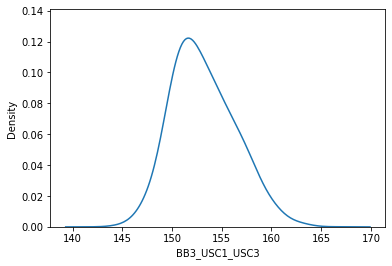

In [321]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_USC1_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  153.93803430782086
parameter K is:  1.4740183112997727


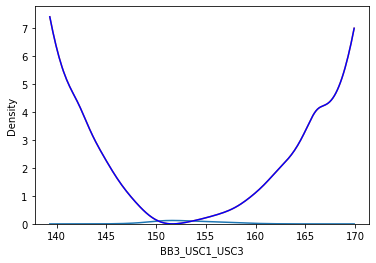

In [322]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[151.3, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])C1
angle_parameters_dict['Parameter'].append('BB3_USC1_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_USC3_Hmapped_angle_all
Mean: Raw data 49.48154924739873
Mode: Raw data 49.56677413158956
Mode: Gauss-fitted 49.56677413158956


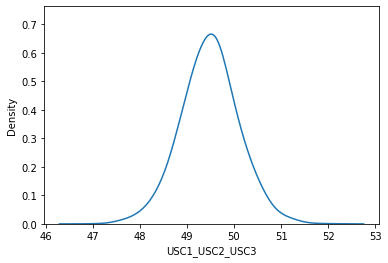

In [323]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_USC3_Hmapped_angle_all)
xmean = np.mean(USC1_USC2_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_USC2_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_USC2_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  50.26548216525953
parameter K is:  2.399082085804135


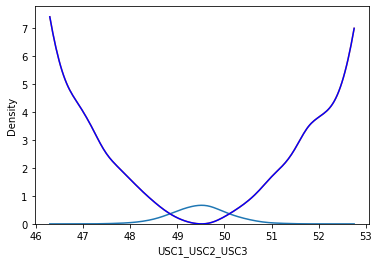

In [324]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[49.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC1_USC2_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [325]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(USC2_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC2_USC1_USC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC1_USC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

NameError: name 'USC2_USC1_USC3_Hmapped_angle_all' is not defined

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[77.1, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC2_USC1_USC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_USC1_Hmapped_angle_all)
xmean = np.mean(USC2_USC3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC2_USC3_USC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_USC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[53.2, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('USC2_USC3_USC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_GSC1_Hmapped_angle_all
Mean: Raw data 31.822275179311042
Mode: Raw data 33.598311246758
Mode: Gauss-fitted 33.598311246758


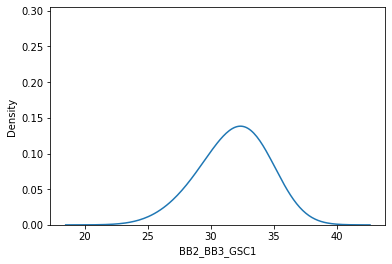

In [326]:
# plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
 
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1.0)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  36.14113678136932
parameter K is:  4.964924870492173


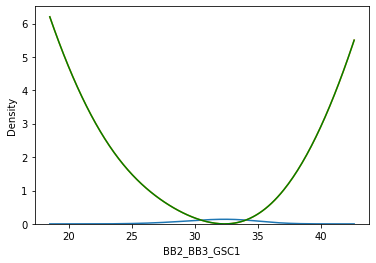

In [327]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[32, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB2_BB3_GSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC2_Hmapped_angle_all
Mean: Raw data 115.52681058692798
Mode: Raw data 112.37789974576012
Mode: Gauss-fitted 112.37789974576012


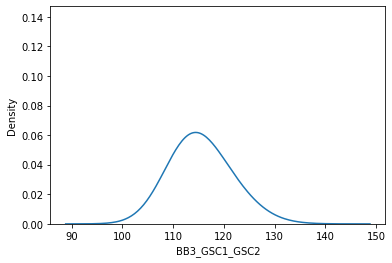

In [328]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC2_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_GSC1_GSC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC2_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_GSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  111.58186782824482
parameter K is:  5.597453850464966


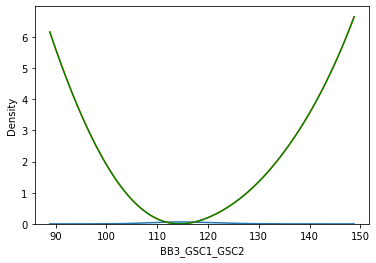

In [329]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[112, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_GSC1_GSC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 122.83578836246086
Mode: Raw data 124.11423817080808
Mode: Gauss-fitted 124.11423817080808


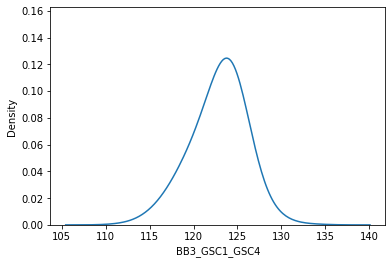

In [330]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_GSC1_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  123.95553166872176
parameter K is:  5.693773201561081


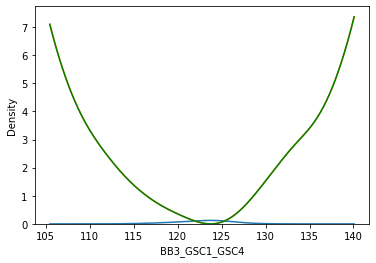

In [331]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[124, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_GSC1_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3_Hmapped_angle_all
Mean: Raw data 70.4800257601778
Mode: Raw data 70.41805097164395
Mode: Gauss-fitted 70.41805097164395


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


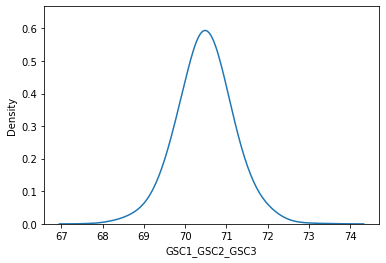

In [332]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_GSC3_Hmapped_angle_all)
xmean = np.mean(GSC1_GSC2_GSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC1_GSC2_GSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_GSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_GSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  69.11505444652678
parameter K is:  1.6911317569554156


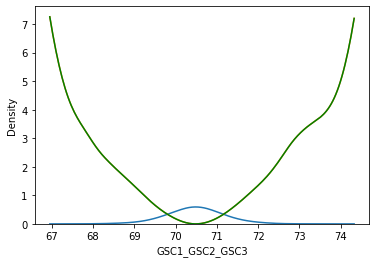

In [333]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC1_GSC2_GSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 113.12719264572179
Mode: Raw data 113.23988496660186
Mode: Gauss-fitted 113.23988496660186


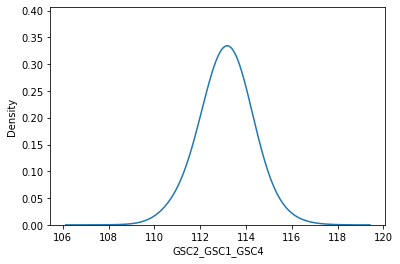

In [334]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC1_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC1_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  117.65579556178342
parameter K is:  6.6182214959198165


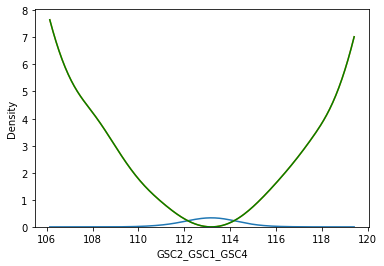

In [335]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[113.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('GSC2_GSC1_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.73995545004544
Mode: Raw data 83.68832980328057
Mode: Gauss-fitted 83.68832980328057


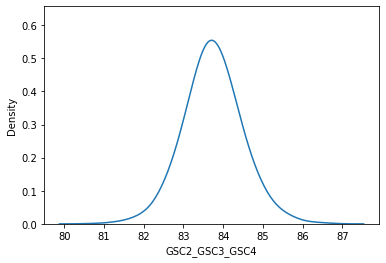

In [336]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])
angle_parameters_dict['Parameter'].append('GSC2_GSC3_GSC4')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  84.82300155207739
parameter K is:  1.902497250611641


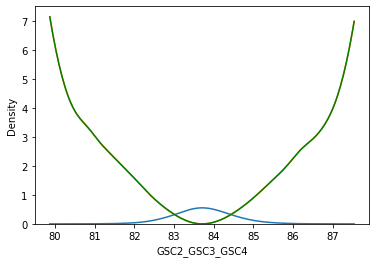

In [337]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[83.6, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_GSC1_Hmapped_angle_all
Mean: Raw data 92.43777906859279
Mode: Raw data 92.36503845707016
Mode: Gauss-fitted 92.36503845707016


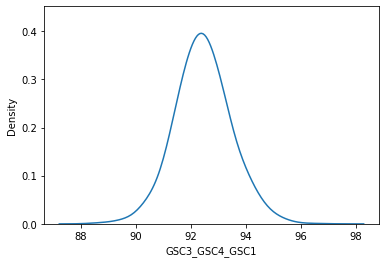

In [338]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_GSC1_Hmapped_angle_all)
xmean = np.mean(GSC3_GSC4_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC3_GSC4_GSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_GSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC3_GSC4_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  92.69336142094802
parameter K is:  6.583588861707963


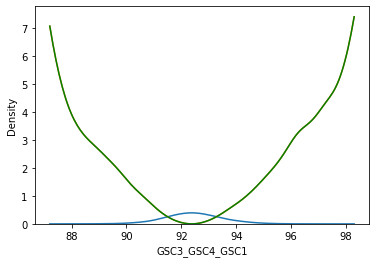

In [339]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.3)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[92.4, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('GSC3_GSC4_GSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_Hmapped_angle_all
Mean: Raw data 28.75048186685524
Mode: Raw data 28.58879238792258
Mode: Gauss-fitted 28.58879238792258


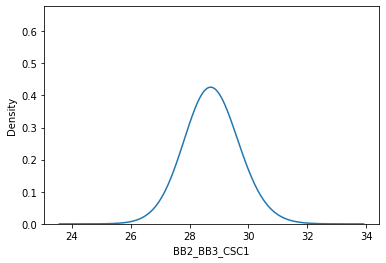

In [340]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_CSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  34.557518866705614
parameter K is:  2.1175153279189853


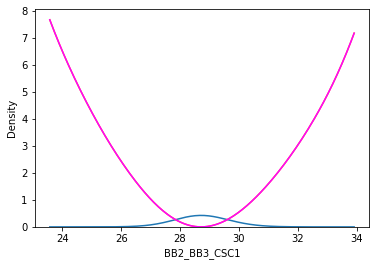

In [341]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=1)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[28.6, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

angle_parameters_dict['Parameter'].append('BB2_BB3_CSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC2_Hmapped_angle_all
Mean: Raw data 98.71978715021719
Mode: Raw data 98.17228411868955
Mode: Gauss-fitted 98.17228411868955


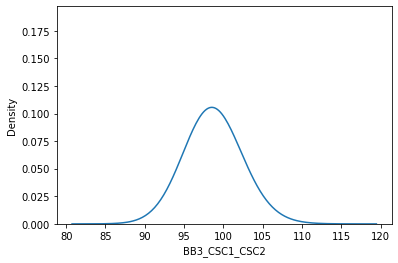

In [342]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC2_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_CSC1_CSC2_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC2_Hmapped_angle_all,bins=10)
# 
# 
# 

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_CSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  102.15552476738509
parameter K is:  6.46603591684201


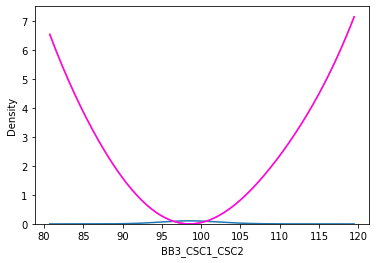

In [343]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[98, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_CSC1_CSC2')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 150.33833387210828
Mode: Raw data 149.89771366082496
Mode: Gauss-fitted 149.89771366082496


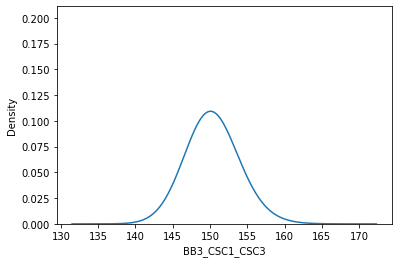

In [344]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_CSC1_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  149.19288875599685
parameter K is:  7.280278184363101


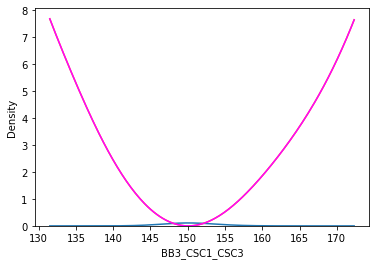

In [345]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[149, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('BB3_CSC1_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_CSC2_CSC3_Hmapped_angle_all
Mean: Raw data 61.94264673199313
Mode: Raw data 61.973530670940505
Mode: Gauss-fitted 61.973530670940505


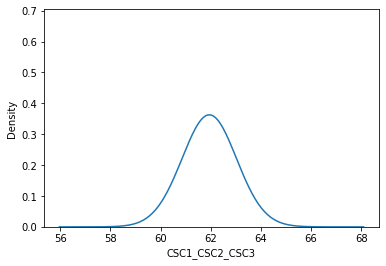

In [346]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC1_CSC2_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(CSC1_CSC2_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_CSC2_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  62.83185285836879
parameter K is:  1.782737204685253


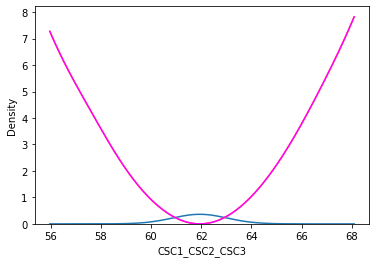

In [347]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[62, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC1_CSC2_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 70.52951702192142
Mode: Raw data 70.50855770910128
Mode: Gauss-fitted 70.50855770910128


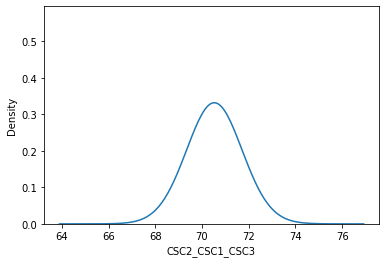

In [348]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC1_CSC3_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC1_CSC3_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  70.73989180173808
parameter K is:  6.517495727444908


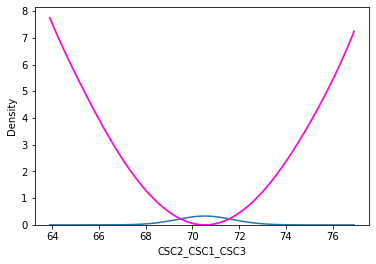

In [349]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70.4, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC2_CSC1_CSC3')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_CSC1_Hmapped_angle_all
Mean: Raw data 47.52783240731387
Mode: Raw data 47.466945936604915
Mode: Gauss-fitted 47.466945936604915


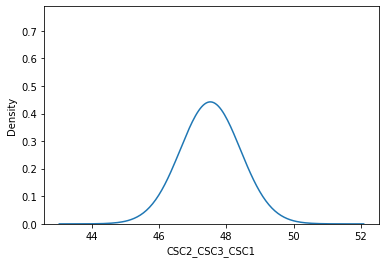

In [350]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_CSC1_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC3_CSC1_Hmapped_angle_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_CSC1_Hmapped_angle_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  53.407075023564055
parameter K is:  2.189257519434473


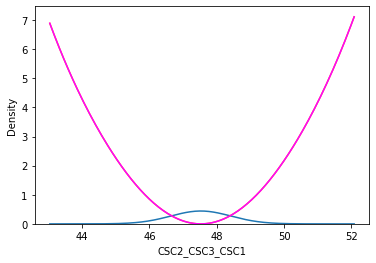

In [351]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=1.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[47.7, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
angle_parameters_dict['Parameter'].append('CSC2_CSC3_CSC1')
angle_parameters_dict['raw data mean value'].append(xmean)
angle_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
angle_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
angle_parameters_dict['K from boltzmann inversion'].append(params[1])

In [352]:
angle_parameters['Parameter'] = angle_parameters_dict['Parameter']
angle_parameters['raw data mean value'] = angle_parameters_dict['raw data mean value']
angle_parameters['raw data mode value gaussian-fitted mode value'] = angle_parameters_dict['raw data mode value gaussian-fitted mode value']
angle_parameters['Seed value obtained using BOltzmann inversion'] = angle_parameters_dict['Seed value obtained using BOltzmann inversion']
angle_parameters['K from boltzmann inversion'] = angle_parameters_dict['K from boltzmann inversion']
angle_parameters.head()
angle_parameters.to_csv("sirna_parameters_Angle.csv")